**Student Name: Huynh Truong Tu**

Below are my assignment for "Going down Mt.Fuji" problem.

----------------------------------------------------------------------------------------------------------------------

In [35]:
import numpy as np
import matplotlib.pyplot as plt
csv_path = "mtfuji_data.csv"
np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [36]:
print(fuji[:,3]) #Test The Elevation

[   0.      0.      0.      0.      0.      0.      6.62    7.21   12.2
   54.41  171.56  177.84  228.21  275.38  433.76  371.74  380.06  503.4
  485.39  477.82  580.5   610.92  654.96  628.22  626.64  572.55  723.95
  701.94  879.47  976.17  919.16  817.    743.06  770.92  864.06  826.52
  748.39  756.11  724.5   724.5   724.5   724.5   724.5   724.5   724.5
  724.5   724.5   724.5   852.18  851.36  831.    880.44  955.14  849.52
  831.6   790.01  738.97  848.83  738.3   736.48  672.24  564.02  552.23
  497.41  558.28  503.02  462.33  469.66  429.49  454.21  412.27  362.29
  355.68  368.91  371.04  371.19  377.62  386.64  390.14  418.41  420.6
  443.    458.66  471.82  488.4   505.1   519.54  536.54  553.64  575.07
  588.99  602.36  613.04  631.71  660.43  672.36  700.15  725.72  741.17
  753.68  772.58  795.25  817.62  858.62  883.89  910.5   932.74  973.32
 1000.24 1034.34 1059.69 1105.8  1166.58 1219.86 1239.97 1292.52 1360.1
 1429.75 1506.66 1561.94 1598.36 1659.43 1726.5  1781.98

#### [Problem 1] Visualization of data

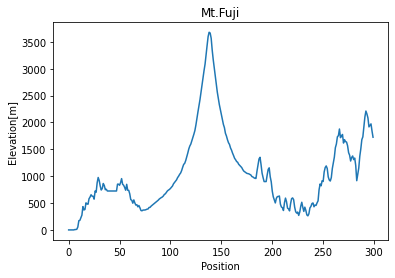

In [3]:
plt.title('Mt.Fuji')
plt.ylabel('Elevation[m]')
plt.xlabel('Position')
plt.plot(fuji[:,0],fuji[:,3])
plt.show()

#### [Problem 2] Create a function to calculate the slope of a point

In [40]:
def grad_cal(data,pt):
    if (pt==0): #if the input pt is zero then there the return slope will be 0
        return 0
    else:
        diff = data[pt]-data[pt-1]
        return diff[3]/diff[0]

In [41]:
#Test the function
pos = 50
print('The slope of position {} is {}'.format(pos,grad_cal(fuji,pos)))

The slope of position 50 is -20.360000000000014


#### [Problem 3] Create a function to calculate the destination

 $$ Destination Point = Current Point-\alpha x CurrentPointGradient $$

In [43]:
def dest(cur_pt,alpha,data):
    des = np.floor(cur_pt-alpha*grad_cal(data,cur_pt))
    if des <= 0: 
        return 0
    elif des >= data.shape[0]: 
        return data.shape[0]
    return int(des)

In [46]:
#Test out the function:
alpha = 0.2
p1 = 50
#The gradient is negative
print('The next destination if we started from position {} is position {}'.format(10,dest(10,alpha,fuji)))
#The destination is within the shape
print('The next destination if we started from position {} is position {}'.format(p1,dest(p1,alpha,fuji)))
#The gradient is out of the shape of data
print('The next destination if we started from position {} is position {}'.format(250,dest(250,alpha,fuji)))

The next destination if we started from position 10 is position 0
The next destination if we started from position 50 is position 54
The next destination if we started from position 250 is position 252


#### [Problem 4] Creating a function to go down the mountain

I'll create a function to decide which direction we are going, if the return value is 0 then we stop, if we going forward then return 1, if we go backward then return -1

In [47]:
def direction(cur_pos,next_pos):
    if cur_pos == next_pos: #we have finished descending
        return 0;
    elif cur_pos < next_pos: #we have gone down
        return 1;
    elif cur_pos > next_pos: #we have climed up
        return -1;

Then I'll use "dest" function in problem 3 to find out what is the next position will be, starting from position 136, then base on the result of "direction" function the function will change alpha and change the course or continue with the current direction.
Finally,export the list of travel path.

In [49]:
def go_down(cur_pos,alpha,data):
    #initial value
    travel_path = [cur_pos]
    #start walking
    while (True):
        next_pos = dest(cur_pos,alpha,data)
        way = direction(cur_pos, next_pos)
        #process the next_pos
        if way == 0:
            break #finish go down
        elif way == -1:
            travel_path.append(next_pos) #set destination to go
            alpha = max(alpha-0.005,0.01) #set min alpha as 0,01
            cur_pos = next_pos
        elif way == 1: #same as '-1' but doesn't change the alpha
            travel_path.append(next_pos)
            cur_pos = next_pos
    return travel_path #get out the loop and return the path
print('Travel_path with alpha of {} is: \n{}'.format(0.2,go_down(136,0.2,fuji)))

Travel_path with alpha of 0.2 is: 
[136, 102, 97, 92, 90, 87, 84, 81, 77, 75, 74, 73, 71, 77, 75, 74, 73, 71, 76, 75, 74, 73, 71, 75, 74, 73, 71, 75, 74, 73, 72]


#### [Problem 5] Visualization of the descent process

Since I don't know how to best initial a value, I'll just set it to 0.2

In [50]:
def visual_path(cur_pos=136,alpha=0.2):
    travel_path = go_down(cur_pos,alpha,fuji)
    travel_height = np.array([fuji[pos,3] for pos in travel_path])
    travel_slope = np.array([grad_cal(fuji, pos) for pos in travel_path])
    plt.plot(fuji[:,0], fuji[:,3])
    plt.plot(travel_path,travel_height)
    plt.title('Mt.Fuji')
    plt.xlabel('Position')
    plt.ylabel('Elevation[m]')
    plt.show()
    plt.title('Elevation and Slope')
    plt.xlabel('Elevation')
    plt.ylabel('Slope')
    plt.plot(travel_height, travel_slope)
    plt.show()

Below are the travel map at 136 position with initial alpha 0.2:

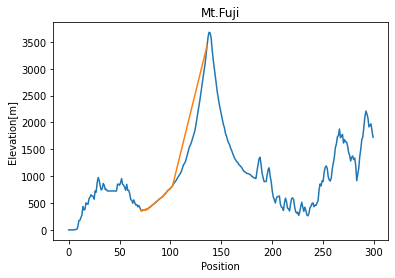

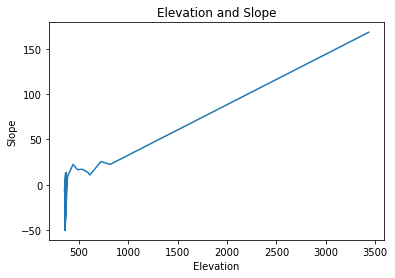

In [28]:
visual_path(136,0.2)

#### [Problem 6] Change of initial value

Below are the travel map at 142 position with initial alpha 0.2:

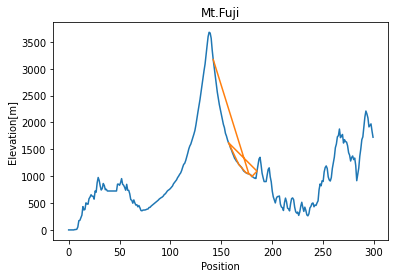

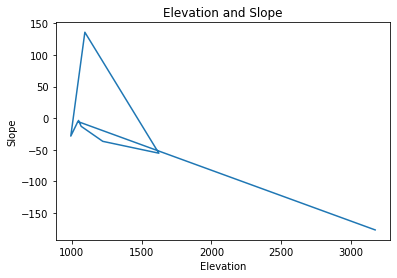

In [51]:
visual_path(142,0.2)

#### [Problem 7] (Advance problem) Change hyperparameters

Below are the travel map at 142 position with initial alpha 0.1:

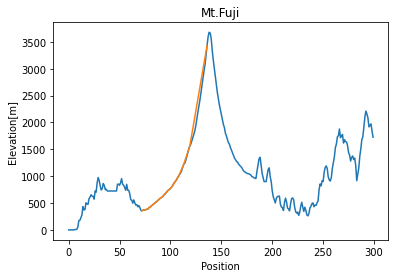

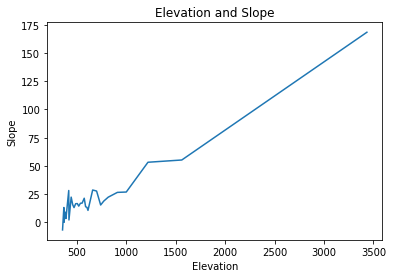

In [52]:
visual_path(136,alpha=0.1)

> The path is much smoother to the map

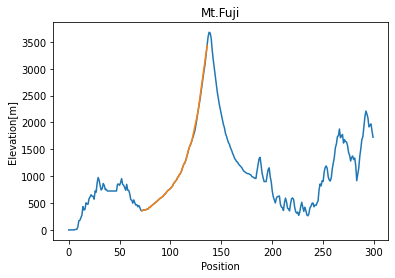

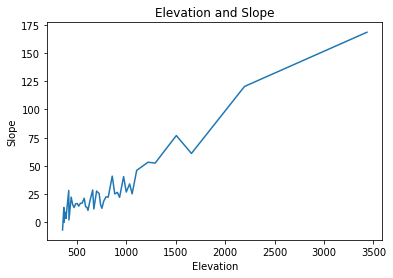

In [53]:
visual_path(136,alpha=0.05)

> And this one is even smoother.

> In conclusion, the travel path varied greatly depending on the hyperparameters.

=======================================================================================================================

This is the end of my assignment. Thank you for reading!